In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 8]

In [3]:
df = pd.read_csv("E:\Data analyst\SQL\Dataset\Gamesales\Video Games Sales.csv")

In [4]:
df.head()

,index,Rank,Game Title,Platform,Year,genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [5]:
for colName in df.columns:
    missingPercent = np.mean(df[colName].isnull())
    print('{} - {}%'.format(colName, missingPercent))

index - 0.0%
Rank - 0.0%
Game Title - 0.0%
Platform - 0.0%
Year - 0.015207131620346093%
genre - 0.0%
Publisher - 0.001048767697954903%
North America - 0.0%
Europe - 0.0%
Japan - 0.0%
Rest of World - 0.0%
Global - 0.0%
Review - 0.0%


In [6]:
null_indices = df.columns[df.isnull().any()].tolist()


In [7]:
df[null_indices]

,Year,Publisher
0,2006.0,Nintendo
1,1985.0,Nintendo
2,2008.0,Nintendo
3,2009.0,Nintendo
4,1989.0,Nintendo
...,...,...
1902,2004.0,Disney Interactive Studios
1903,2010.0,Nintendo
1904,2008.0,Sony Computer Entertainment
1905,2000.0,Electronic Arts


In [8]:
df.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [9]:
pd.set_option('display.min_rows', None)
df.dropna(inplace=True)

In [10]:
df.shape

(1878, 13)

In [11]:
duplicatedRows = df[df.duplicated()]
duplicatedRows

,index,Rank,Game Title,Platform,Year,genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1878 non-null   int64  
 1   Rank           1878 non-null   int64  
 2   Game Title     1878 non-null   object 
 3   Platform       1878 non-null   object 
 4   Year           1878 non-null   float64
 5   genre          1878 non-null   object 
 6   Publisher      1878 non-null   object 
 7   North America  1878 non-null   float64
 8   Europe         1878 non-null   float64
 9   Japan          1878 non-null   float64
 10  Rest of World  1878 non-null   float64
 11  Global         1878 non-null   float64
 12  Review         1878 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 205.4+ KB


In [13]:
if df['Year'].dtypes == 'float64':
    df['Year'] = df['Year'].astype('datetime64[ns]')
    
df['Year'] = df['Year'].astype(str).str[-4:]

In [14]:
df.head()

,index,Rank,Game Title,Platform,Year,genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [15]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'PS2', 'SNES', 'X360', 'GBA', 'PS3',
       'N64', 'PC', 'PS', 'XB', '3DS', 'PSP', 'GC', 'GEN', 'DC', 'SAT',
       'WiiU', 'SCD', 'PSV'], dtype=object)

<AxesSubplot:>

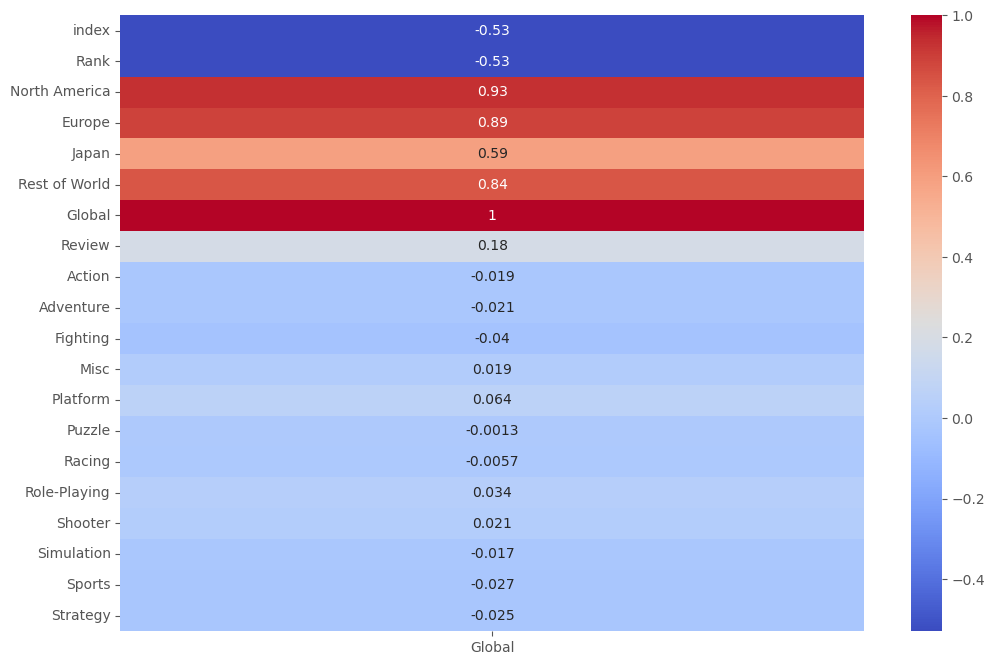

In [16]:
df_onehot = pd.get_dummies(df['genre'])
df_new = pd.concat([df, df_onehot], axis = 1)

corr_matrix = df_new.corr()
corr_global = corr_matrix['Global']

sns.heatmap(corr_global.to_frame(), annot = True, cmap = 'coolwarm')

In [17]:
#tidak terdapat korelasi antara genre dan global

<AxesSubplot:>

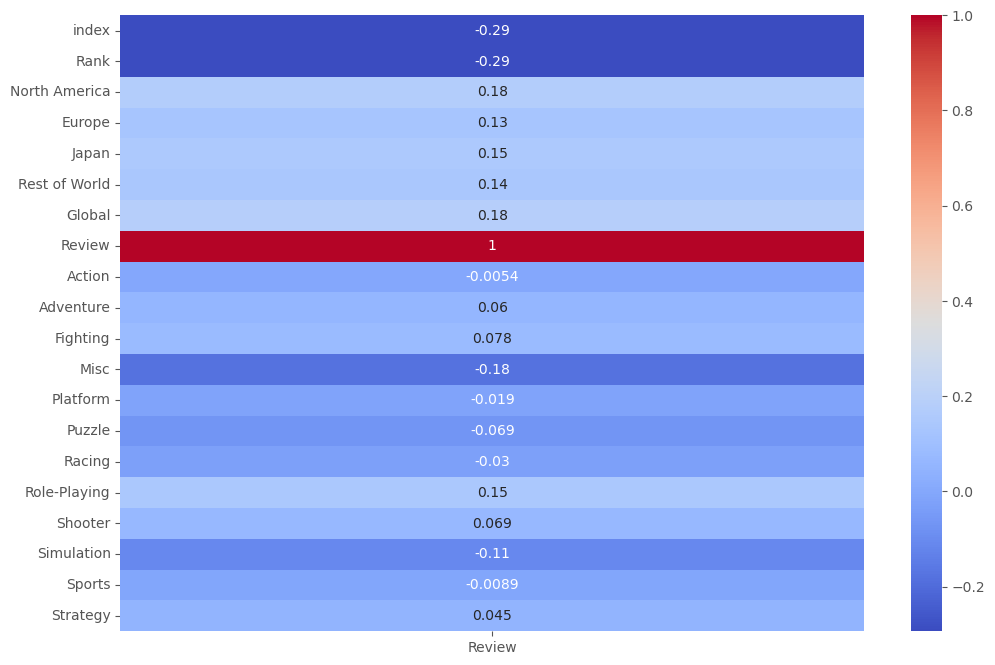

In [18]:
df_onehot = pd.get_dummies(df['genre'])
df_new = pd.concat([df, df_onehot], axis = 1)

corr_matrix = df_new.corr()
corr_review = corr_matrix['Review']

sns.heatmap(corr_review.to_frame(), annot = True, cmap = 'coolwarm')

In [19]:
#tidak terdapat korelasi antara genre dan review

<AxesSubplot:>

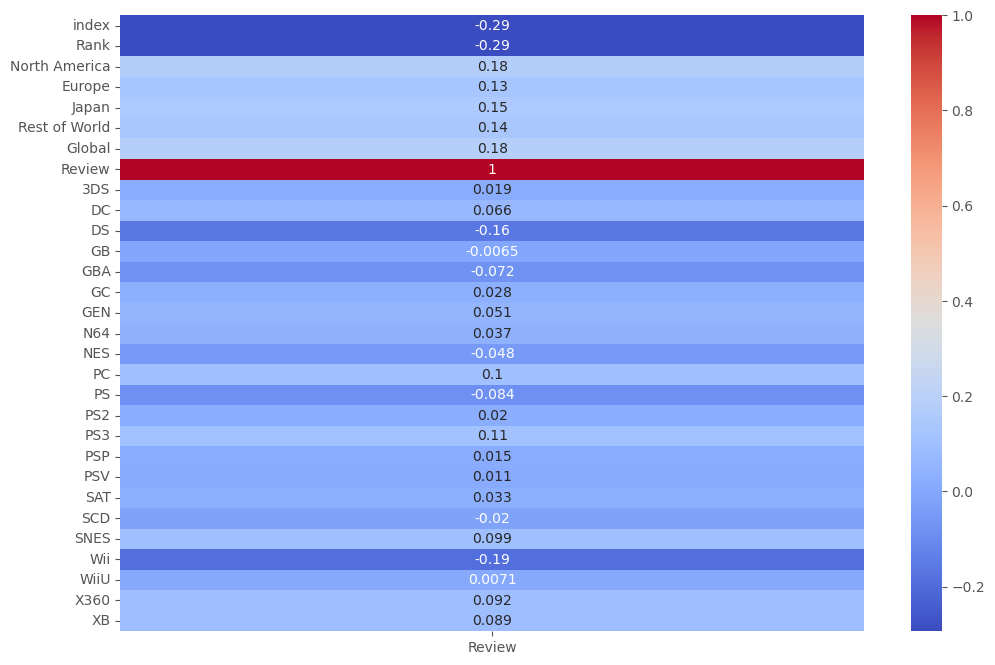

In [20]:
df_onehot = pd.get_dummies(df['Platform'])
df_new = pd.concat([df, df_onehot], axis = 1)

corr_matrix = df_new.corr()
corr_global = corr_matrix['Review']

sns.heatmap(corr_global.to_frame(), annot = True, cmap = 'coolwarm')

In [22]:
df.head()

,index,Rank,Game Title,Platform,Year,genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [23]:
df_onehot = pd.get_dummies(df['genre'])
df_new = pd.concat([df, df_onehot], axis = 1)
corr_mat = df_new.corr(method = 'pearson')['Review']
corr_mat

index           -0.293816
Rank            -0.293816
North America    0.175615
Europe           0.130154
Japan            0.149139
Rest of World    0.137923
Global           0.181890
Review           1.000000
Action          -0.005387
Adventure        0.059589
Fighting         0.077729
Misc            -0.177625
Platform        -0.019061
Puzzle          -0.068812
Racing          -0.029673
Role-Playing     0.145026
Shooter          0.069192
Simulation      -0.111378
Sports          -0.008881
Strategy         0.044877
Name: Review, dtype: float64

<AxesSubplot:>

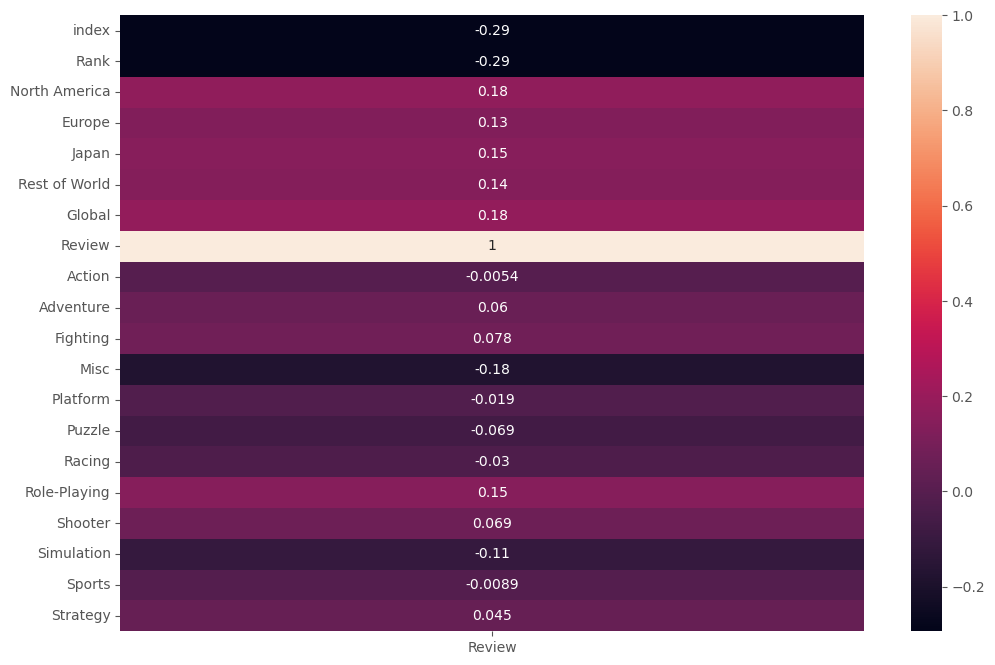

In [24]:
sns.heatmap(corr_mat.to_frame(), annot = True)

In [ ]:
#objChanger = df
#for colName in objChanger.columns:
 #   if objChanger[colName].dtype == 'object':
  #     objChanger[colName]= objChanger[colName].cat.codes        
#objChanger

In [ ]:
#correlation_df = objChanger.corr(method = 'pearson')

In [ ]:
#sns.heatmap(correlation_df, annot= True)